# Problem 1: Modeling the environment

The dynamics of the car are modeled using a discretization of the position and velocity of the car.
$$
s_i = \langle x(t_i), v(t_i) \rangle \in [-5, 5] \times [-5, 5]
$$

The control input is defined to be $u(t) = \dot{v(t)}$, and this can only be changed every 0.1 seconds.

Each **episode** (a sequence of interactions between the model and the environment) is defined to be a sequence of states $s_0, s_{\delta}, s_{2\delta}, ...$

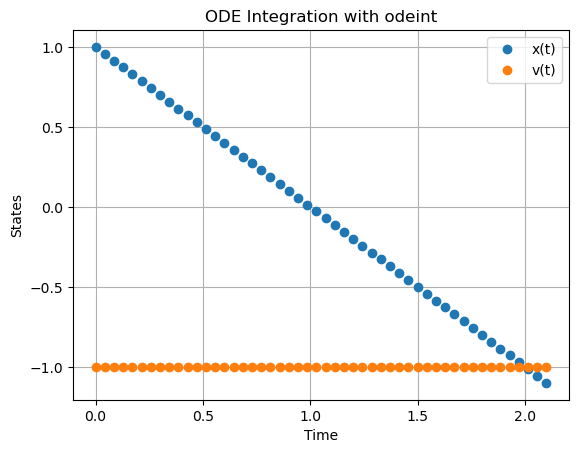

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def model(s, t, u):
    # this is changing the state by incrementing the position
    # by the velocity and the velocity by the acceleration
    dsdt = [s[1], u]
    return dsdt

# the state of the system, which is the position and velocity of the car
s0 = [1, -1]
# the control input, which is the acceleration of the car
u_i = 0
delta = 0.1
step = np.linspace(0, 21*delta)
# this function generates each state at each time step
y = odeint(model, s0, step, args=(u_i,))

plt.plot(step, y[:, 0], 'o', label='x(t)')
plt.plot(step, y[:, 1], 'o', label='v(t)')
plt.title('ODE Integration with odeint')
plt.xlabel('Time')
plt.ylabel('States')
plt.legend()
plt.grid()
plt.show()

In [22]:
s0 = [0.6, -2]
u = 1
step = np.linspace(0, delta)
y = odeint(model, s0, step, args=(u,))
y[-1]

array([ 0.405, -1.9  ])

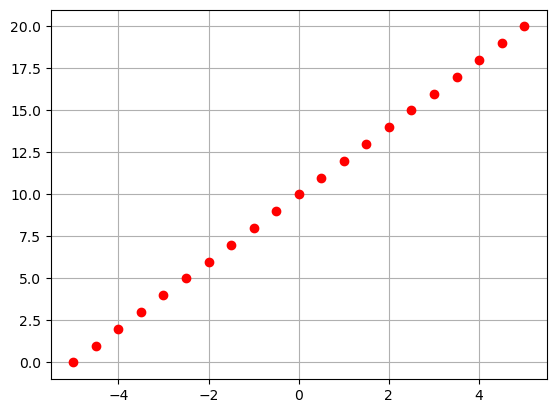

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-5, 5, 21)
Y = np.arange(0, 21)

plt.plot(X, Y, 'ro')
plt.grid()
plt.show()

In [10]:
line = 2*X + 10

line

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [15]:
control_inputs = np.array([-5 , -1 , -0.1, -0.01 , -0.001 , -0.0001 , 0,
0.0001, 0.001, 0.01, 0.1, 1, 5])
control_inputs

array([-5.e+00, -1.e+00, -1.e-01, -1.e-02, -1.e-03, -1.e-04,  0.e+00,
        1.e-04,  1.e-03,  1.e-02,  1.e-01,  1.e+00,  5.e+00])